### Binary Classification - Booking Cancellation

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train dataset 

In [2]:
import pandas as pd
df = pd.read_csv('train_booking.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Seperate X and Y

In [6]:
X = df.drop(columns=['id', 'booking_status'])
Y = df[['booking_status']]

In [7]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [8]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


In [9]:
Y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

## 0- Not Cancelled , 1 - Cancelled

In [10]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

### Create a preprocessing pipeline for X

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [13]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.99805198, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.87015314, -0.73769133],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -1.41540612, -0.73769133],
       ...,
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.2306589 , -0.73769133],
       [-1.75392524, -0.31345354, -0.99881361, ..., -0.10147907,
         0.41556686, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -1.06536717, -0.73769133]])

In [14]:
cols = num_pipe.get_feature_names_out()
cols

array(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'], dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Apply Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [17]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [18]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [19]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [20]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [21]:
xtrain.shape

(33680, 17)

In [22]:
xtest.shape

(8420, 17)

In [23]:
xtrain.shape[1]

17

### Create a neural network

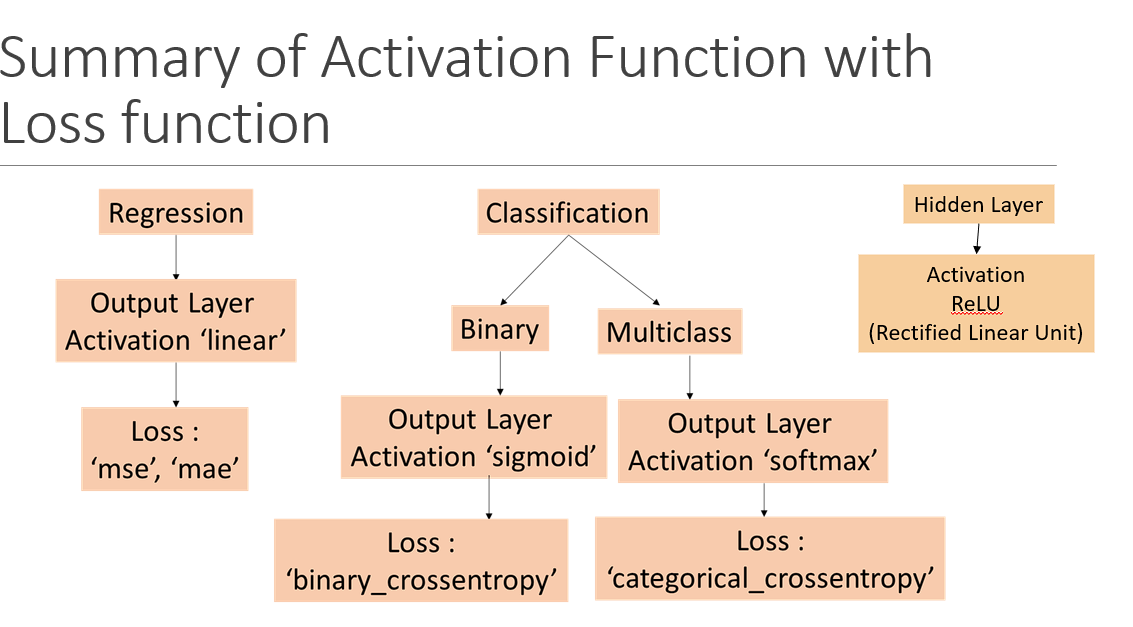

### Dropout layer
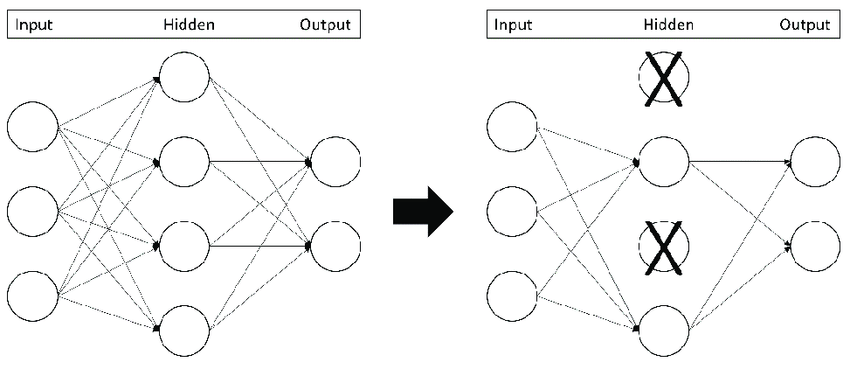

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [25]:
model = Sequential()

# Hidden Layer 1 with 17 input neurons
model.add(Dense(64, activation='relu', input_dim=xtrain.shape[1]))
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output Layer Binary Classification - Sigmoid
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the model

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fit your model

In [28]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


842/842 [==============================] - 2s 2ms/step - loss: 0.5330 - accuracy: 0.7326 - val_loss: 0.4808 - val_accuracy: 0.7721
Epoch 2/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4865 - accuracy: 0.7680 - val_loss: 0.4757 - val_accuracy: 0.7752
Epoch 3/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4806 - accuracy: 0.7739 - val_loss: 0.4712 - val_accuracy: 0.7818
Epoch 4/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4716 - accuracy: 0.7767 - val_loss: 0.4683 - val_accuracy: 0.7834
Epoch 5/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4705 - accuracy: 0.7805 - val_loss: 0.4668 - val_accuracy: 0.7849
Epoch 6/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4685 - accuracy: 0.7820 - val_loss: 0.4672 - val_accuracy: 0.7846
Epoch 7/100
842/842 [==============================] - 1s 1ms/step - loss: 0.4650 - accuracy: 0.7850 - val_loss: 0.4639 - val_accuracy: 0.78

### Plot the learning curve for the above model

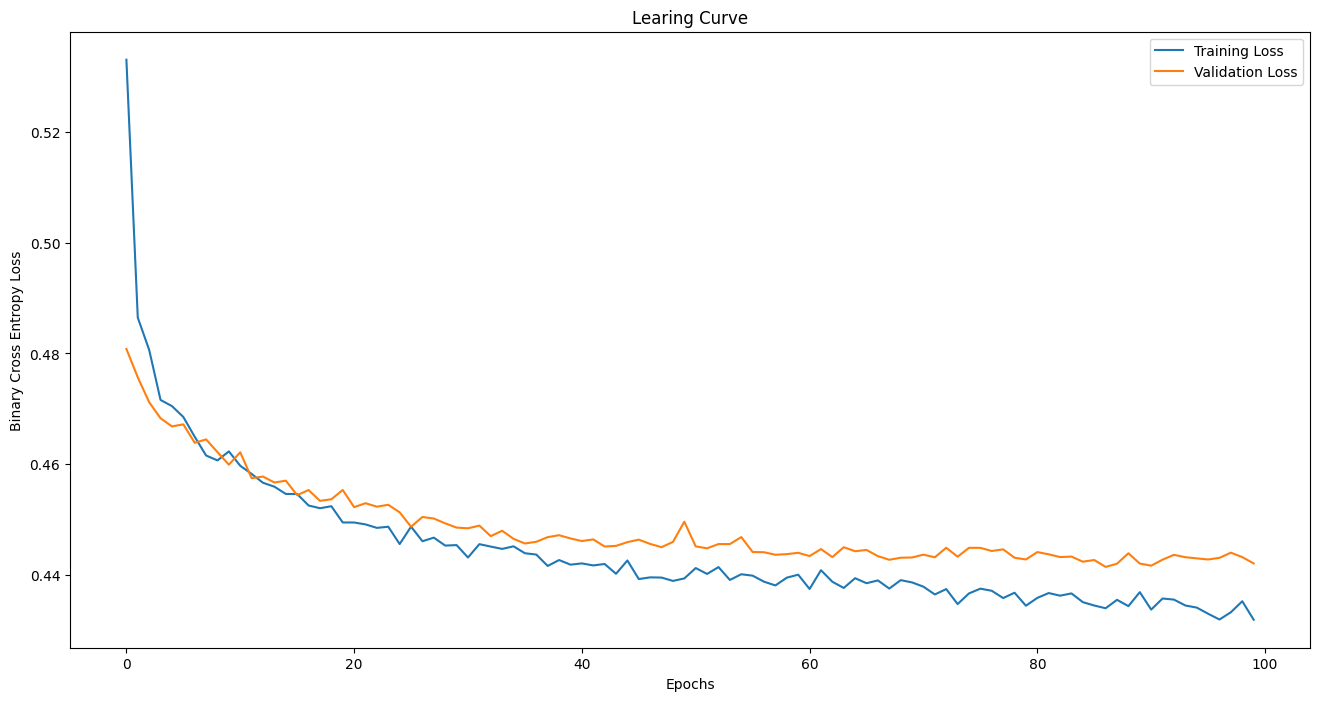

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Learing Curve')
plt.legend()
plt.show()

### Evaluate model

In [30]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 1s 818us/step - loss: 0.4178 - accuracy: 0.8138


[0.4177699387073517, 0.8137767314910889]

In [31]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 0s 944us/step - loss: 0.4319 - accuracy: 0.8053


[0.43185457587242126, 0.8053444027900696]

### Predict the probailities

In [32]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

264/264 [==============================] - 0s 748us/step


In [34]:
yprob_tr[0:5]

array([[0.01634855],
       [0.17541665],
       [0.80211335],
       [0.80689895],
       [0.83395004]], dtype=float32)

In [35]:
yprob_ts[0:5]

array([[0.04067643],
       [0.8879587 ],
       [0.4121242 ],
       [0.00669745],
       [0.14397125]], dtype=float32)

### Get the predictions

In [39]:
ypred_tr = [1 if i>=0.5 else 0 for i in yprob_tr]
ypred_tr[0:5]

[0, 0, 1, 1, 1]

In [37]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [38]:
ypred_ts = [1 if i>=0.5 else 0 for i in yprob_ts]
ypred_ts[0:5]

[0, 1, 0, 0, 0]

In [40]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


### Create a confusion matrix

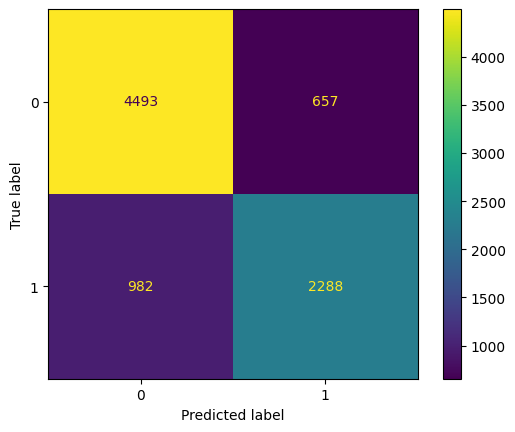

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Check classification report

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      5150
           1       0.78      0.70      0.74      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.79      8420
weighted avg       0.80      0.81      0.80      8420



### Save the model for future use

In [44]:
model.save('BookingModel.keras')

### Loading model

In [46]:
from keras.models import load_model
nn = load_model('BookingModel.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Perform predictions on test_booking.csv

In [47]:
xnew = pd.read_csv('test_booking.csv')
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [48]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    28068 non-null  int64  
 1   no_of_adults                          28068 non-null  int64  
 2   no_of_children                        28068 non-null  int64  
 3   no_of_weekend_nights                  28068 non-null  int64  
 4   no_of_week_nights                     28068 non-null  int64  
 5   type_of_meal_plan                     28068 non-null  int64  
 6   required_car_parking_space            28068 non-null  int64  
 7   room_type_reserved                    28068 non-null  int64  
 8   lead_time                             28068 non-null  int64  
 9   arrival_year                          28068 non-null  int64  
 10  arrival_month                         28068 non-null  int64  
 11  arrival_date   

In [51]:
xnew.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [49]:
xnew1 = xnew.drop(columns=['id'])
xnew1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [50]:
xnew_pre = num_pipe.transform(xnew1)
xnew_pre

array([[ 2.05600472, -0.31345354,  0.13025905, ..., -0.10147907,
         0.29709213,  1.84284918],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 0.15103974,  4.12977678, -0.99881361, ..., -0.10147907,
         3.64669564,  0.55257892],
       ...,
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 2.05600472, -0.31345354, -0.99881361, ..., -0.10147907,
         1.56665649, -0.73769133],
       [ 0.15103974, -0.31345354,  1.25933171, ..., -0.10147907,
        -0.54542469, -0.73769133]])

In [52]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


### Get probabilities for above data

In [53]:
prob = model.predict(xnew_pre)
prob[0:5]

878/878 [==============================] - 1s 763us/step


array([[0.05527691],
       [0.03136981],
       [0.3963342 ],
       [0.14464161],
       [0.4621498 ]], dtype=float32)

### Predict the class 0 (not cancelled) , 1(cancelled)

In [54]:
preds = [1 if i>=0.5 else 0 for i in prob]
preds[0:5]

[0, 0, 0, 0, 0]

### Save above values in xnew dataframe

In [55]:
df_final = xnew[['id']]
df_final

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [56]:
df_final['booking_status_pred'] = preds
df_final['Cancellation_prob'] = prob

In [57]:
df_final

,id,booking_status_pred,Cancellation_prob
0,42100,0,0.055277
1,42101,0,0.031370
2,42102,0,0.396334
3,42103,0,0.144642
4,42104,0,0.462150
...,...,...,...
28063,70163,1,0.980464
28064,70164,0,0.076938
28065,70165,0,0.141415
28066,70166,0,0.423647


In [58]:
df_final['booking_status_pred'].value_counts()

booking_status_pred
0    18322
1     9746
Name: count, dtype: int64

<Axes: title={'center': 'Count Plot for booking status Predicted'}, xlabel='booking_status_pred'>

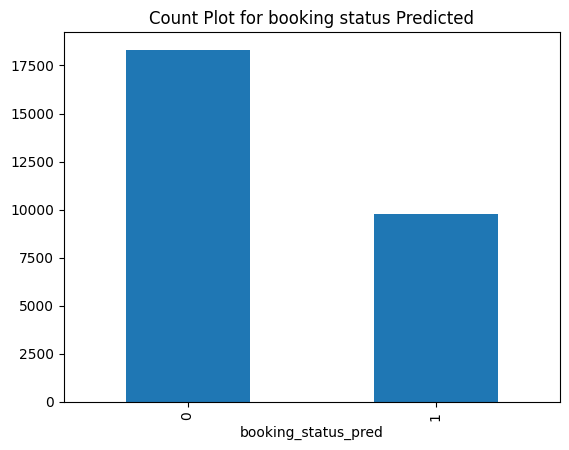

In [59]:
df_final['booking_status_pred'].value_counts().plot(kind='bar', title='Count Plot for booking status Predicted')

### Save filt to csv

In [60]:
df_final.to_csv('BookingResults.csv', index=False)